In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\tshrgpt329\AIML PG')
data_df = pd.read_csv('vehicle.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

From above info it is cearly observable that there are lot of missing values.
Let's treat the missing values.

The code block below will replace all the missing values

In [47]:
total_rows = data_df.count().max()
for each_col in data_df.columns:
    if((data_df[each_col].dtype != 'O') and (data_df[each_col].count()<total_rows)):
        data_df[each_col].fillna(round(data_df[each_col].mean(),2),inplace=True)    

Let's verify again

In [48]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

Let's find and treat the outliers

In [109]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828783,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110449,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888109,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678913,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901773,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933723,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582435,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [54]:
fig = plt.figure(num='title',figsize=(5,5))

<Figure size 360x360 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0xaac4376278>,
 'caps': [<matplotlib.lines.Line2D at 0xaac4376b38>,
 'boxes': [<matplotlib.lines.Line2D at 0xaac4376438>],
 'medians': [<matplotlib.lines.Line2D at 0xaac437d208>],
 'fliers': [<matplotlib.lines.Line2D at 0xaac437d550>],
 'means': []}

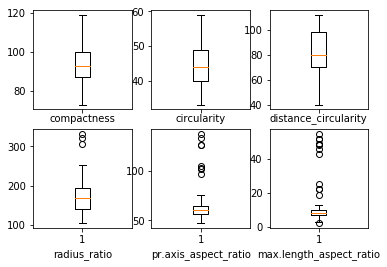

In [111]:
fig,ax = plt.subplots(nrows=2,ncols=3,sharex=True,sharey=False)
#fig.subplots_adjust(left=0.00001, right=0.99, top=0.9, bottom=0.25)
ax[0,0].set_xlabel('compactness')
ax[0,1].set_xlabel('circularity')
ax[0,2].set_xlabel('distance_circularity')
ax[1,0].set_xlabel('radius_ratio')
ax[1,1].set_xlabel('pr.axis_aspect_ratio')
ax[1,2].set_xlabel('max.length_aspect_ratio')
ax[0,0].boxplot(x=data_df['compactness'])
ax[0,1].boxplot(x=data_df['circularity'])
ax[0,2].boxplot(x=data_df['distance_circularity'])
ax[1,0].boxplot(x=data_df['radius_ratio'])
ax[1,1].boxplot(x=data_df['pr.axis_aspect_ratio'])
ax[1,2].boxplot(x=data_df['max.length_aspect_ratio'])

{'whiskers': [<matplotlib.lines.Line2D at 0xaac45310b8>,
 'caps': [<matplotlib.lines.Line2D at 0xaac4531978>,
 'boxes': [<matplotlib.lines.Line2D at 0xaac4531278>],
 'medians': [<matplotlib.lines.Line2D at 0xaac4537048>],
 'fliers': [<matplotlib.lines.Line2D at 0xaac4537390>],
 'means': []}

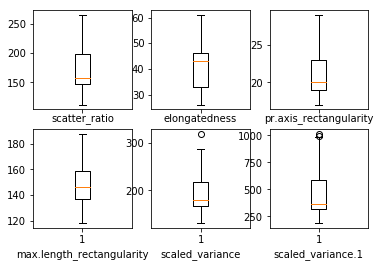

In [112]:
fig,ax = plt.subplots(nrows=2,ncols=3,sharex=True,sharey=False)
#fig.subplots_adjust(left=0.00001, right=0.99, top=0.9, bottom=0.25)
ax[0,0].set_xlabel('scatter_ratio')
ax[0,1].set_xlabel('elongatedness')
ax[0,2].set_xlabel('pr.axis_rectangularity')
ax[1,0].set_xlabel('max.length_rectangularity')
ax[1,1].set_xlabel('scaled_variance')
ax[1,2].set_xlabel('scaled_variance.1')
ax[0,0].boxplot(x=data_df['scatter_ratio'])
ax[0,1].boxplot(x=data_df['elongatedness'])
ax[0,2].boxplot(x=data_df['pr.axis_rectangularity'])
ax[1,0].boxplot(x=data_df['max.length_rectangularity'])
ax[1,1].boxplot(x=data_df['scaled_variance'])
ax[1,2].boxplot(x=data_df['scaled_variance.1'])

{'whiskers': [<matplotlib.lines.Line2D at 0xaac46fc358>,
 'caps': [<matplotlib.lines.Line2D at 0xaac46fcc18>,
 'boxes': [<matplotlib.lines.Line2D at 0xaac46fc518>],
 'medians': [<matplotlib.lines.Line2D at 0xaac4704320>],
 'fliers': [<matplotlib.lines.Line2D at 0xaac4704668>],
 'means': []}

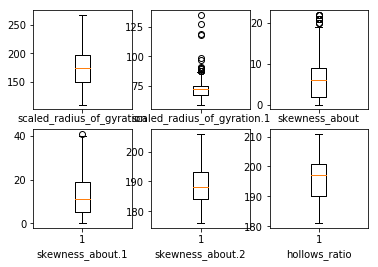

In [113]:
fig,ax = plt.subplots(nrows=2,ncols=3,sharex=True,sharey=False)
#fig.subplots_adjust(left=0.00001, right=0.99, top=0.9, bottom=0.25)
ax[0,0].set_xlabel('scaled_radius_of_gyration')
ax[0,1].set_xlabel('scaled_radius_of_gyration.1')
ax[0,2].set_xlabel('skewness_about')
ax[1,0].set_xlabel('skewness_about.1')
ax[1,1].set_xlabel('skewness_about.2')
ax[1,2].set_xlabel('hollows_ratio')
ax[0,0].boxplot(x=data_df['scaled_radius_of_gyration'])
ax[0,1].boxplot(x=data_df['scaled_radius_of_gyration.1'])
ax[0,2].boxplot(x=data_df['skewness_about'])
ax[1,0].boxplot(x=data_df['skewness_about.1'])
ax[1,1].boxplot(x=data_df['skewness_about.2'])
ax[1,2].boxplot(x=data_df['hollows_ratio'])

From the boxplots, it is observed that foloowing columns has presence of outliers.
radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1

In [129]:
columns_list = ['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']
for each_col in columns_list:
    iqr = data_df[each_col].quantile(0.75)-data_df[each_col].quantile(0.25)
    upper_whisker = data_df[each_col].quantile(0.75)+1.5*iqr
    lower_whisker = data_df[each_col].quantile(0.25)-1.5*iqr
    data_df[each_col][data_df[each_col]>upper_whisker]
data_df['radius_ratio'][data_df['radius_ratio']>data_df['radius_ratio'].quantile(0.75)+1.5*(data_df['radius_ratio'].quantile(0.75)-data_df['radius_ratio'].quantile(0.25))]

Series([], Name: radius_ratio, dtype: float64)